# Gasific

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install scipy
!pip3 install matplotlib

### Biomass gasification reaction  


CH$_a$O$_b$N$_c$ + $d$H$_2$O + $e$(O$_2$ + 3.76 N$_2$) -> $\quad$
   $n_1$C + $n_2$H + $n_3$CO + $n_4$H$_2$O + $n_5$CO$_2$ + $n_6$CH$_4$ + $n_7$N$_2$


$$
a = \frac {H}{C}
$$
$$
b = \frac {O}{C}
$$
$$
c = \frac {N}{C}
$$
where  
$C$- carbon from ultimate  
$H$- hydrogen from ultimate  
$O$- oxygen from ultimate  
$N$- nitrogen from ultimate  


## 1. Biomass Ultimate Analysis

### 1.1. Ultimate Analysis Value

In [2]:
# ultimate
rawC = 43.19
rawH = 5.92
rawO = 50.17
rawN = 0.59

### 1.2. Data Normalization

In [3]:
# normalize
sum = rawC + rawH + rawO + rawN

C = rawC/sum*100
H = rawH/sum*100
O = rawO/sum*100
N = rawN/sum*100

(C,H,O,N)

(43.24622008611194, 5.92770601782317, 50.23530589766697, 0.5907679983979173)

### 1.3. Stoichiometric Ratio

In [4]:
# biomass formula
# hydrogen/carbon
a = H / C
# oxygen/carbon
b = O / C
# nitrogen/carbon
c = N / C

(a, b, c)

(0.1370687659180366, 1.1616114841398473, 0.01366056957629081)

## 2. Operating Conditions Setup

In [5]:
# simulation range
# temperature
TStart = 100
TEnd = 2000
TStep = 50
# pressure
PStart = 0
PEnd = 2
PStep = 0.5
# steam
SStart = 0
SEnd = 2
SStep = 1
# Air
AStart = 0
AEnd = 2
AStep = 1

## 3. Importing Physical Property Data

In [6]:
import pandas as pd
df = pd.read_csv('gasif_data.csv')
df.head()

,FORMULA,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,...,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3,DELSF
0,CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,...,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0,197.71
1,CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,...,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0,213.47
2,CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,...,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0,186.26
3,C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,...,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0,219.24
4,CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,...,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0,218.57


In [7]:
df.shape

(9, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMULA        9 non-null      object 
 1   NO             9 non-null      int64  
 2   COMPOUND-NAME  9 non-null      object 
 3   MOLWT          9 non-null      float64
 4   TFP            9 non-null      float64
 5   TBP            9 non-null      float64
 6   TC             9 non-null      float64
 7   PC             9 non-null      float64
 8   VC             9 non-null      float64
 9   LDEN           9 non-null      float64
 10  TDEN           9 non-null      float64
 11  HVAP           9 non-null      float64
 12  NO.1           9 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  NO.2           9 non-null      int64  
 16  VISA           9 non-null      float64
 17  VISB           9 non-null      float64
 18  DELHF         

In [9]:
df.set_index("FORMULA", inplace=True)
df

,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,...,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3,DELSF
FORMULA,,,,,,,,,,,,,,,,,,,,,
CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,-192.0,...,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0,197.71
CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,20.0,...,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0,213.47
CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,-161.0,...,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0,186.26
C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,-110.0,...,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0,219.24
CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,20.0,...,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0,218.57
H2O,20,WATER,18.015,0.0,100.0,647.3,220.5,0.056,998.0,20.0,...,0.001924,0.000011,-3.596000e-09,18.3036,3816.44,-46.13,11.0,168.0,20.0,69.96
O2,34,OXYGEN,31.999,-218.8,-183.0,154.6,50.5,0.073,1149.0,-183.0,...,-0.000004,0.000017,-1.065000e-08,15.4075,734.55,-6.45,-210.0,-173.0,34.0,204.82
H2,19,HYDROGEN,2.016,-259.2,-252.8,33.2,13.0,0.065,71.0,-253.0,...,0.009274,-0.000014,7.645100e-09,13.6333,164.90,3.19,-259.0,-248.0,19.0,130.46
N2,31,NITROGEN,28.013,-209.9,-195.8,126.2,33.9,0.090,805.0,-195.0,...,-0.013570,0.000027,-1.168000e-08,14.9542,588.72,-6.60,-219.0,-183.0,31.0,191.32


In [10]:
dfGF = df['DELGF']
dfGF
[gfCO, gfCO2, gfCH4, gfC2H4, gfCH4O, gfH2O, gfO2, gfH2, gfN2] = list(dfGF)
gfC = 0.0

In [11]:
[gfCO, gfCO2, gfCH4, gfC2H4, gfCH4O, gfH2O, gfO2, gfH2, gfN2] = list(dfGF)
gfC = 0.0
gfCO, gfCO2, gfCH4, gfC2H4, gfCH4O, gfH2O, gfO2, gfH2, gfN2, gfC

(-137.37, -394.65, -50.87, 68.16, -162.62, -228.77, 0.0, 0.0, 0.0, 0.0)

In [12]:
dfHF = df['DELHF']
dfHF

FORMULA
CO     -110.62
CO2    -393.77
CH4     -74.86
C2H4     52.33
CH4O   -201.30
H2O    -242.00
O2        0.00
H2        0.00
N2        0.00
Name: DELHF, dtype: float64

In [13]:
[hfCO, hfCO2, hfCH4, hfC2H4, hfCH4O, hfH2O, hfO2, hfH2, hfN2] = list(dfHF)
hfC = 0.0

hfCO, hfCO2, hfCH4, hfC2H4, hfCH4O, hfH2O, hfO2, hfH2, hfN2, hfC

(-110.62, -393.77, -74.86, 52.33, -201.3, -242.0, 0.0, 0.0, 0.0, 0.0)

In [14]:
dfSF = df['DELSF']
dfSF

FORMULA
CO      197.71
CO2     213.47
CH4     186.26
C2H4    219.24
CH4O    218.57
H2O      69.96
O2      204.82
H2      130.46
N2      191.32
Name: DELSF, dtype: float64

In [15]:
[sfCO, sfCO2, sfCH4, sfC2H4, sfCH4O, sfH2O, sfO2, sfH2, sfN2] = list(dfSF)
sfC = 5.68

sfCO, sfCO2, sfCH4, sfC2H4, sfCH4O, sfH2O, sfO2, sfH2, sfN2, sfC

(197.71, 213.47, 186.26, 219.24, 218.57, 69.96, 204.82, 130.46, 191.32, 5.68)

## 4. Model Properties Calculation

### 4.1 Property Functions

In [16]:
def ke(G, T, R):
    return math.exp(-G/R/T)

def computeGibbs(G,n):
    sum = 0
    for i,v in enumerate(G):
        sum += G[i]*n[i]    
    return sum

def computeGibbs2(H,S,T):       
    return H - T*S

def computeEntropy(S,n):
    sum = 0
    for i,v in enumerate(S):
        sum += S[i]*n[i]    
    return sum

def computeHeatOfReaction(H,n):
    sum = 0
    for i,v in enumerate(H):
        sum += H[i]*n[i]    
    return sum

def equilb_const(G, R, T):
    return math.exp(-G/R/T)

### 4.2. Calculate reactions Heat of reaction, Gibbs free energy and Entropy

In [17]:
# 202

# Carbon Reactions
## Boudouard
## R1: CO2 + C -> 2CO
hR1 = computeHeatOfReaction([hfCO2, hfC, hfCO], [-1, -1, 2])
gfR1 = computeGibbs([gfCO2, gfC, gfCO], [-1, -1, 2])
sfR1 = computeEntropy([sfCO2, sfC, sfCO], [-1, -1, 2])

## water-gas or steam
## R2: C + H2O -> H2 + CO
hR2 = computeHeatOfReaction([hfC, hfH2O, hfH2, hfCO], [-1, -1, 1, 1])
gfR2 = computeGibbs([gfC, gfH2O, gfH2, gfCO], [-1, -1, 1, 1])
sfR2 = computeEntropy([sfC, sfH2O, sfH2, sfCO], [-1, -1, 1, 1])

## hydrogasification
## R3: C + 2H2 -> CH4
hR3 = computeHeatOfReaction([hfC, hfH2, hfCH4], [-1, -2, 1])
gfR3 = computeGibbs([gfC, gfH2, gfCH4], [-1, -2, 1])
sfR3 = computeEntropy([sfC, sfH2, sfCH4], [-1, -2, 1])

## R4: C + 0.5 O2 -> CO
hR4 = computeHeatOfReaction([hfC, hfO2, hfCO], [-1, -.5, 1])
gfR4 = computeGibbs([gfC, gfO2, gfCO], [-1, -.5, 1])
sfR4 = computeEntropy([sfC, sfO2, sfCO], [-1, -.5, 1])

# Oxidation Reactions
## R5: C + O2 -> CO2
hR5 = computeHeatOfReaction([hfC, hfO2, hfCO2], [-1, -1, 1])
gfR5 = computeGibbs([gfC, gfO2, gfCO2], [-1, -1, 1])
sfR5 = computeEntropy([sfC, sfO2, sfCO2], [-1, -1, 1])

## R6: CO + 0.5 O2 -> CO2
hR6 = computeHeatOfReaction([hfCO, hfO2, hfCO2], [-1, -.5, 1])
sfR6 = computeEntropy([sfCO, sfO2, sfCO2], [-1, -.5, 1])

## R7: CH4 + 2O2 -> CO2 + 2H2O
hR7 = computeHeatOfReaction([hfCH4, hfO2, hfCO2, hfH2O], [-1, -2, 1, 2])
sfR7 = computeEntropy([sfCH4, sfO2, sfCO2, sfH2O], [-1, -2, 1, 2])

## R8: H2 + 0.5O2 -> H2O
hR8 = computeHeatOfReaction([hfH2, hfO2, hfH2O], [-1, -.5, 1])
sfR8 = computeEntropy([sfH2, sfO2, sfH2O], [-1, -.5, 1])

# Shift Reactions
## R9: CO + H2O -> CO2 + H2
hR9 = computeHeatOfReaction([hfCO, hfH2O, hfCO2, hfH2], [-1, -1, 1, 1])
gfR9 = computeGibbs([gfCO, gfH2O, gfCO2, gfH2], [-1, -1, 1, 1])
sfR9 = computeEntropy([sfCO, sfH2O, sfCO2, sfH2], [-1, -1, 1, 1])

## Methanation Reactions
## R10: 2CO + 2H2 -> CH4 + CO2
hR10 = computeHeatOfReaction([hfCO, hfH2, hfCH4, hfCO2], [-2, -2, 1, 1])
sfR10 = computeEntropy([sfCO, sfH2, sfCH4, sfCO2], [-2, -2, 1, 1])

## R11: CO + 3H2 -> CH4 + H2O
hR11 = computeHeatOfReaction([hfCO, hfH2, hfCH4, hfH2O], [-1, -3, 1, 1])
sfR11 = computeEntropy([sfCO, sfH2, sfCH4, sfH2O], [-1, -3, 1, 1])

## R14: CO2 + 4H2 -> CH4 + 2H2O
hR14 = computeHeatOfReaction([hfCO, hfH2, hfCH4, hfH2O], [-1, -4, 1, 2])
sfR14 = computeEntropy([sfCO, sfH2, sfCH4, sfH2O], [-1, -4, 1, 2])

# Steam-Reforming Reactions
## R12: CH4 + H2O -> CO + 3H2
hR12 = computeHeatOfReaction([hfCH4, hfH2O, hfCO, hfH2], [-1, -1, 1, 3])
sfR12 = computeEntropy([sfCH4, sfH2O, sfCO, sfH2], [-1, -1, 1, 3])

## R13: CH4 + 0.5O2 -> CO + 2H2
hR13 = computeHeatOfReaction([hfCH4, hfO2, hfCO, hfH2], [-1, -.5, 1, 2])
sfR13 = computeEntropy([sfCH4, sfO2, sfCO, sfH2], [-1, -.5, 1, 2])

# Split Reactions 
## R15: CO2 -> CO + 0.5O2
hR15 = computeHeatOfReaction([hfCO2, hfCO, hfO2], [-1, 1, 0.5])
gfR15 = computeGibbs([gfCO2, gfCO, gfO2], [-1, 1, 0.5])
sfR15 = computeEntropy([sfCO2, sfCO, sfO2], [-1, 1, 0.5])

print(gfR1, gfR2, gfR3, gfR9, gfR15, '\n', hR1, hR2, hR3, hR9, hR15, '\n', sfR1, sfR2, sfR3, sfR9, sfR15)


119.90999999999997 91.4 -50.87 -28.50999999999999 257.28 
 172.52999999999997 131.38 -74.86 -41.14999999999998 283.15 
 176.27 252.53000000000003 -80.34000000000003 76.25999999999999 86.65


## 5. Equilibrium Model Simulation

### 5.1. Gasification Function

In [18]:
from scipy.optimize import fsolve
import math

def gasification( gfR1=0, gfR2=0, gfR3=0, # gibbs
                    hR1=0, sfR1=0, hR2=0, sfR2=0, hR3=0, sfR3=0, # Heat of reaction, Entropy
                    C = 43.19, H = 5.92, N = 0.59, O = 50.16, # CHaObNc
                    d = 1, # H2O    
                    e = 1, # air  
                    P = 1, # pressure
                    T = (600+273.15) #K
                    ):
    R = 8.3145 #J/mol K
    Ke1 = equilb_const(gfR1, R, T)
    Ke2 = equilb_const(gfR2, R, T)
    Ke3 = equilb_const(gfR3, R, T)
    a = H/C
    b = O/C
    c = N/C

    def func(x):
        return [
            x[0]+x[2]+x[4]+x[5]-1,
            2.0*x[1]+2.0*x[3]+4.0*x[5]-a-2*d,
            x[2]+x[3]+2*x[4]-b-d-2*e,
            x[6]-c-7.52*e,
            x[1]+x[2]+x[4]+x[5]+x[6]-x[7],
            x[4]*x[7]*Ke1 - (x[2]**2)*P,
            x[3]*x[7]*Ke2 - x[1]*x[2]*P,
            (x[3]**2)*Ke3*P - x[5]*x[7],
        ]
    root = fsolve(func, [1,1,1,1,1,1,1,1])
    (C,H2,CO,H2O,CO2,CH4,N2,nT) = tuple(root)
    tot = H2 + CO + H2O + CO2 + CH4 + N2
    (fH2,fCO,fH2O,fCO2,fCH4,fN2) = (H2/tot, CO/tot, H2O/tot, CO2/tot, CH4/tot, N2/tot)

    return {'C':abs(C),'H2':H2,'CO':CO,'H2O':H2O,'CO2':CO2,'CH4':CH4,'N2':N2,'fH2':fH2,'fCO':fCO,'fCO2':fCO2,'fCH4':fCH4}

### 5.2. Simulation

In [19]:
import pandas as pd 
import numpy as np

# create the array of operating condition value
Temp=np.arange(TStart, TEnd+TStep, TStep)
Press=np.arange(PStart, PEnd+PStep, PStep)
Steam=np.arange(SStart, SEnd+SStep, SStep)
Air=np.arange(AStart, AEnd+AStep, AStep)

rlt=[]

for T in Temp:
    for P in Press:
        for d in Steam:
            for e in Air:        
                data = gasification(
                    gfR1*1000,
                    gfR2*1000,
                    gfR3*1000,
                    C=C,H=H,O=O,N=N,
                    T=T+273.15, P=P, d=d, e=e)
                data['T']=T
                data['P']=P
                data['Steam']=d
                data['Air']=e

                
                rlt.append(data)


dfW = pd.DataFrame(rlt)

dfW

C:\sdk\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\sdk\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\sdk\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 1800.
  warnings.warn(msg, RuntimeWarning)


,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
0,0.495758,-0.517903,-0.296962,2.213012e-01,6.186360e-01,1.825680e-01,0.013661,-2.340262,-1.341889,2.795448e+00,8.249752e-01,100,0.0,0,0
1,2.161611,0.068534,3.161611,1.777527e-11,6.410412e-11,3.607921e-14,7.533661,0.006367,0.293726,5.955526e-12,3.351901e-15,100,0.0,0,1
2,4.161611,0.068534,5.161611,2.387924e-14,3.549418e-14,-2.596242e-14,15.053661,0.003379,0.254470,1.749878e-15,-1.279958e-15,100,0.0,0,2
3,0.585777,-0.427884,-1.754130,5.377264e-01,1.689008e+00,4.793460e-01,0.013661,-0.795728,-3.262124,3.141017e+00,8.914311e-01,100,0.0,1,0
4,3.161611,1.068534,4.161611,7.577420e-15,-3.180369e-15,-2.166456e-15,7.533661,0.083716,0.326048,-2.491709e-16,-1.697343e-16,100,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1.299849,0.101709,0.127166,3.279518e-01,1.853247e+00,3.194366e-01,7.533661,0.009910,0.012390,1.805726e-01,3.112455e-02,2000,2.0,1,1
1751,2.246466,0.139786,0.211900,4.046636e-01,2.772524e+00,2.620423e-01,15.053661,0.007418,0.011245,1.471258e-01,1.390545e-02,2000,2.0,1,2
1752,1.351383,0.046745,0.054835,2.677350e-01,1.419521e+00,8.770273e-01,0.013661,0.017445,0.020464,5.297663e-01,3.273072e-01,2000,2.0,2,0
1753,2.105712,0.148870,0.146131,5.079914e-01,2.253745e+00,7.058363e-01,7.533661,0.013179,0.012936,1.995129e-01,6.248422e-02,2000,2.0,2,1


In [20]:
dfW2 = abs(dfW)
dfW2

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
0,0.495758,0.517903,0.296962,2.213012e-01,6.186360e-01,1.825680e-01,0.013661,2.340262,1.341889,2.795448e+00,8.249752e-01,100,0.0,0,0
1,2.161611,0.068534,3.161611,1.777527e-11,6.410412e-11,3.607921e-14,7.533661,0.006367,0.293726,5.955526e-12,3.351901e-15,100,0.0,0,1
2,4.161611,0.068534,5.161611,2.387924e-14,3.549418e-14,2.596242e-14,15.053661,0.003379,0.254470,1.749878e-15,1.279958e-15,100,0.0,0,2
3,0.585777,0.427884,1.754130,5.377264e-01,1.689008e+00,4.793460e-01,0.013661,0.795728,3.262124,3.141017e+00,8.914311e-01,100,0.0,1,0
4,3.161611,1.068534,4.161611,7.577420e-15,3.180369e-15,2.166456e-15,7.533661,0.083716,0.326048,2.491709e-16,1.697343e-16,100,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1.299849,0.101709,0.127166,3.279518e-01,1.853247e+00,3.194366e-01,7.533661,0.009910,0.012390,1.805726e-01,3.112455e-02,2000,2.0,1,1
1751,2.246466,0.139786,0.211900,4.046636e-01,2.772524e+00,2.620423e-01,15.053661,0.007418,0.011245,1.471258e-01,1.390545e-02,2000,2.0,1,2
1752,1.351383,0.046745,0.054835,2.677350e-01,1.419521e+00,8.770273e-01,0.013661,0.017445,0.020464,5.297663e-01,3.273072e-01,2000,2.0,2,0
1753,2.105712,0.148870,0.146131,5.079914e-01,2.253745e+00,7.058363e-01,7.533661,0.013179,0.012936,1.995129e-01,6.248422e-02,2000,2.0,2,1


In [21]:
# drop negative values
dfDrop =dfW.loc[(dfW['H2'] < 0) | (dfW['CO'] < 0) | (dfW['CO2'] < 0) | (dfW['CH4'] < 0)]

dfR = dfW.drop(list(dfDrop.index))
print(dfDrop.shape)
dfDrop.head()


(376, 15)


,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
0,0.495758,-0.517903,-0.296962,2.213012e-01,6.186360e-01,1.825680e-01,0.013661,-2.340262,-1.341889,2.795448e+00,8.249752e-01,100,0.0,0,0
2,4.161611,0.068534,5.161611,2.387924e-14,3.549418e-14,-2.596242e-14,15.053661,0.003379,0.254470,1.749878e-15,-1.279958e-15,100,0.0,0,2
3,0.585777,-0.427884,-1.754130,5.377264e-01,1.689008e+00,4.793460e-01,0.013661,-0.795728,-3.262124,3.141017e+00,8.914311e-01,100,0.0,1,0
4,3.161611,1.068534,4.161611,7.577420e-15,-3.180369e-15,-2.166456e-15,7.533661,0.083716,0.326048,-2.491709e-16,-1.697343e-16,100,0.0,1,1
5,5.161611,1.068534,6.161611,-5.111760e-12,-3.372683e-12,5.394923e-12,15.053661,0.047951,0.276506,-1.513513e-13,2.421006e-13,100,0.0,1,2


In [22]:

T = 1900
P = 1
d = 2
e = 0
dfQ = dfR[(dfR['T']==T) & (dfR['P']==P) & (dfR['Steam']==d) & (dfR['Air']==e)]
dfQ.iloc[:,7:]

,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
1644,0.02902,0.024178,0.510084,0.305284,1900,1.0,2,0


## 6. Composition Visualization

### 6.1. Gas Composition versus Temperature

#### 6.1.1. Pressure = 1atm, Steam = 2kg and Air = 0 

In [23]:
# query
P = 1
d = 2
e = 0
dfQ = dfR[(dfR['P']==P) & (dfR['Steam']==d) & (dfR['Air']==e)]
dfQ.head()

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
24,1.614619,2.757948e-08,2.748925e-08,0.000454,1.580579,1.034040,0.013661,1.049155e-08,1.045722e-08,0.601270,0.393361,100,1.0,2,0
69,1.613878,2.493845e-07,2.490765e-07,0.001195,1.580208,1.033670,0.013661,9.486868e-08,9.475151e-08,0.601129,0.393220,150,1.0,2,0
114,1.612510,1.401160e-06,1.397252e-06,0.002563,1.579523,1.032985,0.013661,5.330170e-07,5.315304e-07,0.600868,0.392959,200,1.0,2,0
159,1.610322,5.621615e-06,5.591630e-06,0.004751,1.578428,1.031889,0.013661,2.138521e-06,2.127115e-06,0.600450,0.392541,250,1.0,2,0
204,1.607168,1.387823e-05,6.985277e-06,0.007902,1.576851,1.030309,0.013661,5.279416e-06,2.657268e-06,0.599850,0.391940,300,1.0,2,0


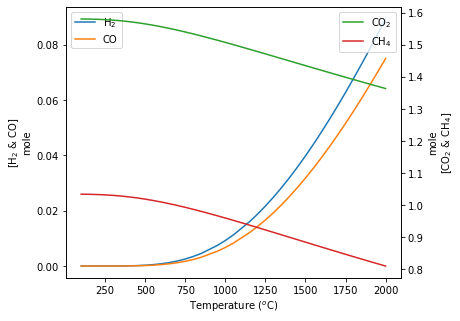

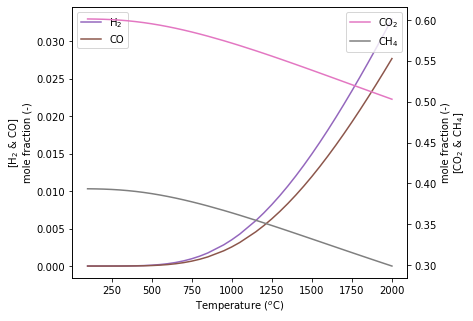

In [24]:
# plot gases vs Temperature

import matplotlib.pyplot as plt

x = list(dfQ['T'])
y = list(dfQ['H2'])

fig, ax1 = plt.subplots(figsize=(6,5))
color = next(ax1._get_lines.prop_cycler)['color']
line1 = ax1.plot(x, dfQ['H2'], color=color, label='H$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
line2 = ax1.plot(x, dfQ['CO'], color=color, label='CO')
ax1.set_xlabel('Temperature ($^o$C)')
ax1.set_ylabel('[H$_2$ & CO]\nmole')
ax1.legend()

ax1x = ax1.twinx()

color = next(ax1._get_lines.prop_cycler)['color']
line3 = ax1x.plot(x, dfQ['CO2'], color=color, label='CO$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
line4 = ax1x.plot(x, dfQ['CH4'], color=color, label='CH$_4$')
ax1x.set_ylabel('mole\n[CO$_2$ & CH$_4$]')
ax1x.legend()
# ax1.legend([line1,line2,line3,line4],['H2','CO','CO2','CH4'])

fig, ax2 = plt.subplots(figsize=(6,5))
color = next(ax1._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fH2'], color=color, label='H$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fCO'], color=color, label='CO')
ax2.set_xlabel('Temperature ($^o$C)')
ax2.set_ylabel('[H$_2$ & CO]\nmole fraction (-)')
ax2.legend()

ax2x = ax2.twinx()

color = next(ax1._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCO2'], color=color, label='CO$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCH4'], color=color, label='CH$_4$')
ax2x.set_ylabel('mole fraction (-)\n[CO$_2$ & CH$_4$]')
ax2x.legend()

plt.show()

#### 6.1.2. Varying Pressure, Steam = 1 and Air = 0

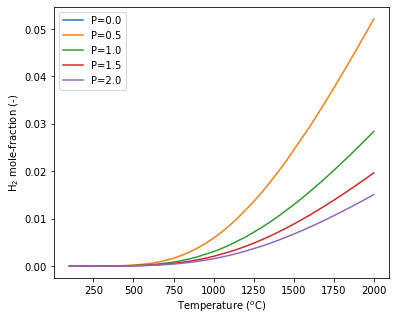

In [25]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for P in Press:
    for d in Steam[1:2]:
        for e in Air[0:1]:
            dfQ1 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ1['T'], dfQ1['fH2'], label=f'P={P}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

#### 6.1.3. Varying Steam, Air = 0 and Presure = 1atm

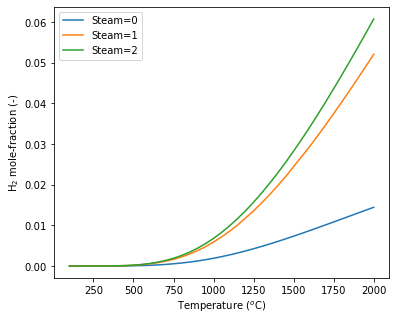

In [26]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for d in Steam:
    for e in Air[0:1]:
        for P in Press[1:2]:
            dfQ2 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ2['T'], dfQ2['fH2'], label=f'Steam={d}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

#### 6.1.4. Varying Air, Pressure = 1atm, and Steam = 1kg

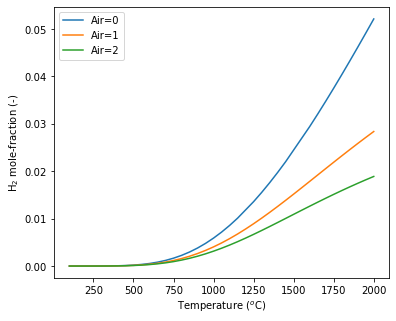

In [27]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for e in Air:
    for d in Steam[1:2]:
        for P in Press[1:2]:
            dfQ3 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ3['T'], dfQ3['fH2'], label=f'Air={e}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

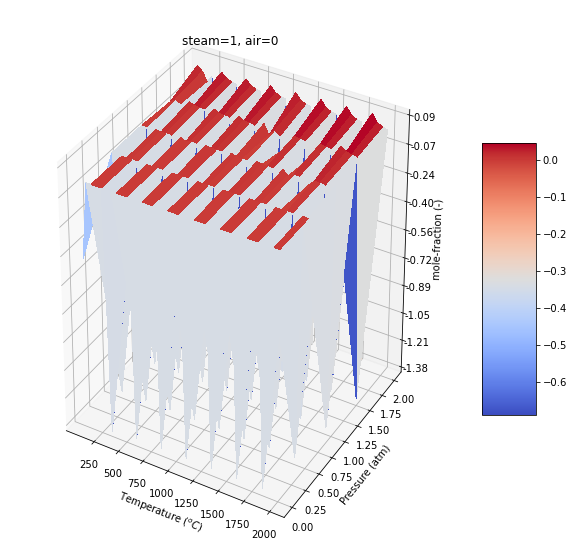

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

d = Steam[1]
e = Air[0]
dfQ4 = dfW[
        # (dfR['T']==T) 
        # & 
        # (dfR['P']==P) 
        # & 
        (dfW['Steam']==d) 
        & 
        (dfW['Air']==e)
        ]

# Make data.
X = Temp
Y = Press
X, Y = np.meshgrid(X, Y)
v = dfQ4['H2'].to_numpy()
(m,n) = X.shape
Z = v.reshape(m,-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(min(v), max(v))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Temperature ($^oC$)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('mole-fraction (-)')

ax.set_title(f'steam={d}, air={e}')

# fig.tight_layout()

plt.show()

TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a str

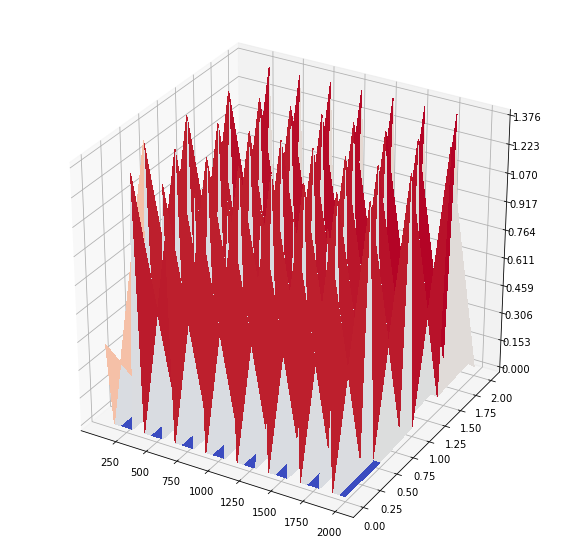

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

d = Steam[1]
e = Air[0]
dfQ4 = dfW2[
        # (dfR['T']==T) 
        # & 
        # (dfR['P']==P) 
        # & 
        (dfW['Steam']==d) 
        & 
        (dfW['Air']==e)
        ]

# Make data.
X = Temp
Y = Press
X, Y = np.meshgrid(X, Y)
v = dfQ4['H2'].to_numpy()
(m,n) = X.shape
Z = v.reshape(m,-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(min(v), max(v))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Temperature ($^oC$)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('mole-fraction (-)')

ax.set_title(f'steam={d}, air={e}')

plt.show()